# SQUIDGAME SENTIMENTAL ANALYSIS

   ***Squid game is a popular TV Show in Netflix.  Which was watched by people all over the world for its unique plot.  People responded to it by reviews and opinions.  In this project, We are going to analyze the data produced by people to conclude the sentiment about Squidgame using Sentimental analysis in Python.***

### IMPORTING THE LIBRARIES AND DATASET

*The dataset that we use in this project is collected from **Twitter**, which includes **user_name, user_location, user_description, user_created, text that shows the reviews** given by respective users.*
*The libraries numpy, pandas and matplotlib are imported to clean and preprocess the data.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("tweets_v8.csv")

### CLEANING THE DATASET
*After importing the dataset, We can view them using the dataset using the command **head().***

In [4]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


### CHECK FOR THE TOTAL NUMBER OF MISSING DATAS IN THE DATASET
*From this, We can see the null values in the column user_location, the total null values in each columns can be viewed using **isnull()** command.   It is clear, that we have null values in both user_location and user_description.  We are removing these columns, as they may not affect the output of the analysis.*

In [5]:
print(data.isnull().sum())

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64


### DROPPING COLUMNS WITH NULL VALUES

In [6]:
data = data.drop(columns= "user_location", axis =1)

In [7]:
print(data.isnull().sum())

user_name              4
user_description    5211
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64


In [8]:
data = data.drop(columns = "user_description", axis =1)

In [9]:
data.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


## DATA PRE-PROCESSING OF TEXT COLUMN
*For further analysis we are going to use the text column.  There are different kinds of words, links and punctuation are there in the column.  **Natural Language Processing** is used to pre-process the data, we'll be using NLTK and RE packages to remove stopwords from the data.*

In [10]:
import nltk
import re
nltk.download('stopwords')
stem = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://www.S+',' ',text)
    text = re.sub('<# //>+', ' ',text)
    text = re.sub('\n',' ',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stem.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,life hit time poverti strike gong yoo let pla...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,marbl episod squidgam ruin 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,squidgam time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,blood 1st slide im join squidgam thing im alre...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,two first game player kill mask guy bloodi ni...,Twitter Web App,False


### CREATING THE WORDCLOUD
*WordCloud is used to display the most frequently used word with visualization.  For this, We'll be using the packages **wordcloud** and **matplotlib** to visualize the wordcloud.*

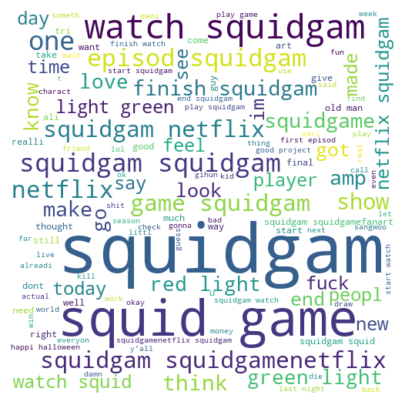

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 500, height=500, stopwords=stopwords, background_color="white", min_font_size = 10).generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### SENTIMENT ANALYSIS OF THE DATA
*After pre-processing the data, we are going to analyze the data using the package **VaderSentiment**. By assinging the respective values to the variables, we can create new columns in the dataset called positive, negative and Neutral. Where each column gives the polarity of respective sentences.*

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data["Positive"] = [sia.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sia.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sia.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text","Positive","Negative","Neutral"]]

In [14]:
data.head()

,text,Positive,Negative,Neutral
0,life hit time poverti strike gong yoo let pla...,0.161,0.101,0.738
1,marbl episod squidgam ruin 😭😭😭,0.000,0.593,0.407
2,squidgam time,0.000,0.000,1.000
3,blood 1st slide im join squidgam thing im alre...,0.113,0.221,0.667
4,two first game player kill mask guy bloodi ni...,0.000,0.439,0.561


### SUM OF THE INDIVIDUAL REVIEWS
*Using **sum** command, we can summarize the polarity of each columns, by which we can conclude either we have a positive, negative or neutral responses for the Webseries.*

In [15]:
total_positive_score = sum(data["Positive"])
total_negative_score  = sum(data["Negative"])
total_neutral_score  = sum(data["Neutral"])

In [16]:
print("Positive reviews:",total_positive_score)
print("Negative reviews:",total_negative_score)
print("Neutral reviews:",total_neutral_score)

Positive reviews: 10974.112000000037
Negative reviews: 5838.680000000066
Neutral reviews: 63206.28900000331


### RESULT OF SENTIMENTAL ANALYSIS

In [17]:
def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(total_positive_score,total_negative_score,total_neutral_score)

Neutral


# CONCLUSION
 ***From the Sum of individual review, We can note that the total number of neutral and positive reviews are high to negative reviews comparatively.  Also, based on the result, We can say that the reviews are neutral.  Squidgame is the most trending Webseries in Netflix, the positive responses behind them will also be a reason for its success.***